> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Miguel Antônio Ribeiro e Silva
* **Matrícula:** 04680

# Aula Prática 08
## Regressão Linear

**Objetivo:** Extrair correlação entre atributos de dados reais por meio da técnica de regressão linear.
**Pré-requisitos:** Linguagem de programação Python, estatística básica \
**Meta:** Ao final da prática, o aluno será capaz de preparar dados e extrair correlações interessantes a partir da aplicação da técnica de regressão linear, e prever valores numéricos contínuos.

----

In [2]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p8/weatherHistory.csv

'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [3]:
#### Não altere essa célula!!! ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_8 import *

# Roteiro

## Carregando os dados

Vamos utilizar como exemplo um conjunto de dados que contém várias características e os preços de imóveis da cidade de Boston. O objetivo da regressão é gerar um modelo que permita prever o preço de um imóvel com base em suas características.

Esse conjunto de dados está na biblioteca `scikit-learn`.

In [4]:
boston = load_boston()

NameError: name 'load_boston' is not defined

Observe que a variável `boston` é um dicionário/mapa/hash...

In [ ]:
# Note que boston é um dicionário/mapa/hash
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

### Transformando o dataset em um DataFrame Pandas

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

Os preços dos imóveis estão no campo target do conjunto original. Então, vamos colocar os preços como uma nova coluna (lembre, o preço é a variável dependente que queremos estimar utilizando regressão)

In [ ]:
df['PRICE'] = boston.target
df

## Avaliando relação par-a-par entre variáveis e o preço do imóvel

Antes de se criar um modelo de regressão, é importante avaliar as correlações entre todas as possíveis variáveis.

In [ ]:
sns.pairplot(df[['PRICE','RM','CRIM','ZN']])

### Analisando o RM

Vamos olhar individualmente para o RM (Número de Quartos). Qual sua relação com o preço?

In [ ]:
plt.scatter(df.RM, df.PRICE)
plt.xlabel('Número médio de quartos (RM)')
plt.ylabel('Preço')
plt.title('Relação entre número de quartos e preço')
plt.show()

#### Calculando a Correlação & Coeficiente de Pearson
Uma medida importante para saber se duas variáveis numéricas estão relacionadas é a Correlação de Pearson

In [ ]:
# sns.jointplot(x='RM', y='PRICE', data=df, alpha = 0.1, stat_func=pearsonr)

graph = sns.jointplot(data=df, x='RM', y='PRICE', alpha=0.1)
r, p = stats.pearsonr(df['RM'], df['PRICE'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

In [ ]:
correlation_columns = ['PRICE','RM','CRIM','ZN']
correlation = df[correlation_columns].corr()
matrix = np.triu(df[correlation_columns].corr())
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, center=0, cmap='coolwarm', mask=matrix)

## Criando um modelo de regressão linear utilizando RM e PRICE

#### Funções importantes de LinearRegression:
- **lm.fit()** -> Fits a linear model;
- **lm.predict()** -> Predict Y using the linear model with estimated coefficients;
- **lm.score()** -> Returns the coefficient of determination (R^2). 

### Cenário 1:
- Variável Independente: `RM`
- Variável Dependente: `PRICE`

In [ ]:
X = df.RM
Y = df.PRICE

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))

Ou seja, a cada aumento de uma unidade em RM (número de quartos), o preço aumenta em 9.10. O R2 (coeficiente de determinação) é de 0.48. Ou seja, 52% da variação do preço não é explicada pelo RM.

### Cenário 2:
Agora vamos fazer a regressão multi-variada. Para isso, vamos separar os atributos independentes (X) e o atributo dependente preço (Y), e criar uma instância da classe LinearRegression


- Variável Independente: `Todas colunas, exceto PRICE`
- Variável Dependente: `PRICE`

In [ ]:
X = df.drop('PRICE', axis=1)
Y = df.PRICE

lm = LinearRegression()
lm.fit(X, Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X, Y))

Observem como o R2 melhorou, ao adicionar as outras variáveis.

Agora, vamos apresentar os coeficientes estimados para todas as variáveis independentes

In [ ]:
# Mostrar os coeficientes da regressão.
print('Intercept %.3f ' % lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Nesse caso, a equação linear ficaria assim:

**Equação**: `PRICE = 36.49 + CRIM * -0.10 + ZN * 0.04 + …. + LSTAT * -0.52`

### Prevendo preço de um imóvel que não se sabe o preço

A partir de um imóvel que se sabe as características, vamos prever qual o preço.

In [ ]:
X = sm.add_constant(df.drop('PRICE', axis =1))
Y = df.PRICE

results = sm.OLS(Y, X).fit()

print(results.summary())

Podemos ver que `INDUS` e `AGE` apresentaram um valor-p alto, e o intervalo de confiança inclui o zero. Então, podemos remover essas duas variáveis, e vamos ver que o resultado não muda significativamente.

In [ ]:
X = sm.add_constant(df.drop(['PRICE', 'AGE', 'INDUS'], axis=1))
Y = df.PRICE

results = sm.OLS(Y,X).fit()

print(results.summary())

Note que o R^2 continuou igual!

# Exercícios

Os exercícios abaixo são referentes ao conjunto de dados `weatherHistory` que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Execute e não remova a célula abaixo antes de iniciar os exercícios. Faça todas as atividades manipulando a variável `df`.

In [4]:
# Atribui o dataframe com o estado "original" em uma variável isolada
original_df = pd.read_csv('./weatherHistory.csv')
df = original_df.copy()


## 1. Faça uma análise exploratória dos dados.
Antes de fazer a regressão, entenda as variáveis, e as suas possíveis relações entre elas.

Utilize de gráficos par a par e também **ESCREVA** quais variáveis você **observa através dos gráficos** com correlação fortes ou fracas.

Essa questão não possui verificação automática mas você pode pedir dicas com `q1.hint()`

<Figure size 1000x800 with 0 Axes>

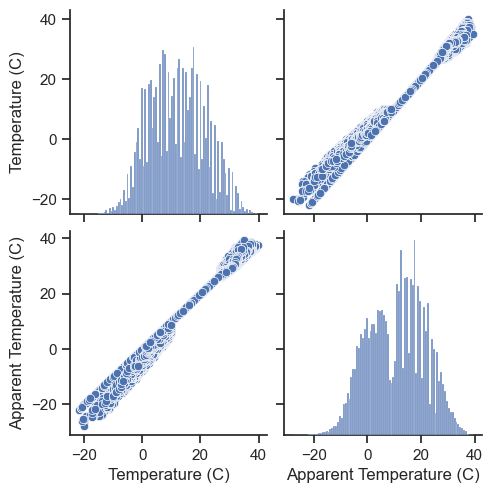

In [5]:
# Pairplot Temperature x Apparent Temperature

sns.set(style="ticks")
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Temperature (C)', 'Apparent Temperature (C)']])
#q1.hint(4)

##### Há uma correlação muito alta entre Temperatura e Temperatura Aparente, os valeres são quase que idênticos, oq ue é óbvio

<Figure size 1000x800 with 0 Axes>

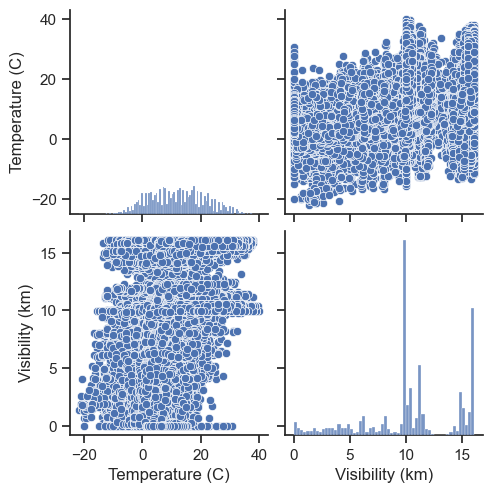

In [6]:
# Pairplot Temperature x Visibility (km)

sns.set(style="ticks")
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Temperature (C)', 'Visibility (km)']])
#q1.hint(5)

##### Aparentemente não há correlação entre Temperatura (ou Temperatura Aparente, já que são bem parecidos) e Visibilidade, pelo pair plot

<Figure size 1000x800 with 0 Axes>

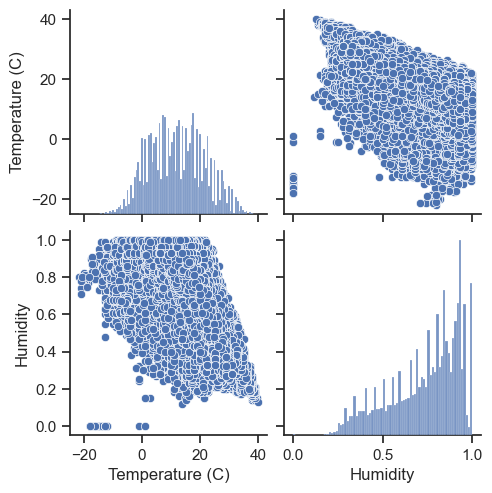

In [7]:
# Pairplot Temperature x Humidity
sns.set(style="ticks")
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Temperature (C)', 'Humidity']])
#q1.hint(5)

##### Parece que há uma correlação negativa considerável entre Temperatura (e temperatura aparente) e Umidade

C:\Users\Miguel\AppData\Local\Temp\ipykernel_9556\585672734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


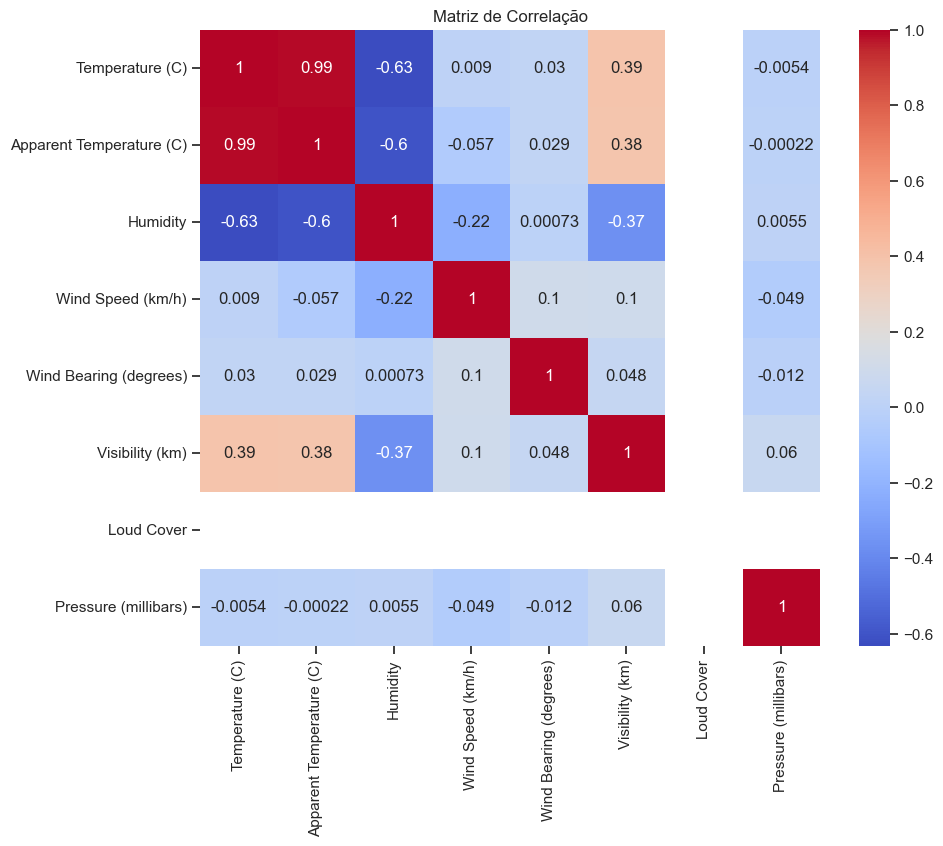

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#### RESPOSTA 1:

##### Correlações confirmadas pela matriz de correlação e pairplots:
##### Temperatura x Temperatura Aparente --> Correlação positiva forte (obviamente)
##### Temperatura x Umidade --> Correlação negativa (mais alta temperatura, menos úmido)
##### Temperatura Aparente x Umidade --> Correlação negativa (mais alta temperatura, menos úmido)
##### Temperatura x Visibilidade --> Correlação positiva fraca
##### Temperatura Aparente x Visibilidade --> Correlação positiva fraca
##### Umidade x Visibilidade --> Correlação negativa fraca
##### Loud Cover é sempre 0, então não há correlação com nada

## 2. Obtenha a Equação Linear que representa a temperatura em termos da umidade.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q2.hint()`

Coeficiente estimado: -30.89
Coeficiente de determinação: 0.40
Equação Linear: y = ax + b = [-30.89438376] * x + 34.636929126889584


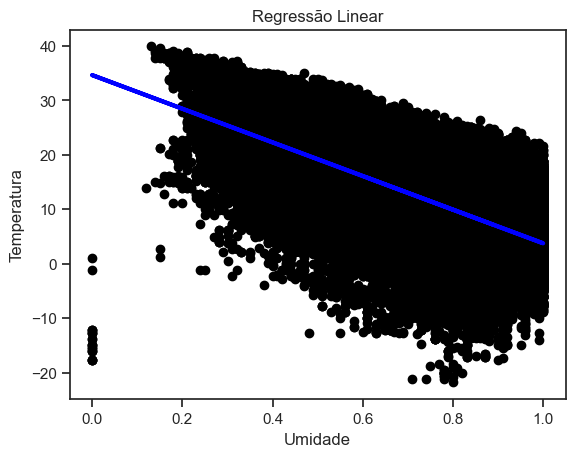

In [9]:
x = df['Humidity']
y = df['Temperature (C)']

# Cria o modelo de regressão linear
lm = LinearRegression()

# Treina o modelo de regressão linear
lm.fit(x.values.reshape(-1,1), y)

# Coeficiente estimado
print('Coeficiente estimado: %.2f' % lm.coef_)
# Coeficiente de determinação (R^2)
print('Coeficiente de determinação: %.2f' % lm.score(x.values.reshape(-1,1), y))

# Equação Linear
print('Equação Linear: y = ax + b =' , lm.coef_, '* x +', lm.intercept_)

# Plot dos dados e da reta ajustada
plt.scatter(x, y, color='black')
plt.plot(x, lm.predict(x.values.reshape(-1,1)), color='blue', linewidth=3)
plt.xlabel('Umidade')
plt.ylabel('Temperatura')
plt.title('Regressão Linear')
plt.show()

#q2.hint()

#### Resposta 2:

- Coeficiente estimado: -30.89
- Coeficiente de determinação: 0.40
- Equação Linear: y = ax + b = [-30.89438376] * x + 34.636929126889584

## 3. Obtenha a Equação Linear que representa a temperatura em termos da umidade E velocidade do vento.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

In [10]:
X = df[['Humidity', 'Wind Speed (km/h)']]
Y = df['Temperature (C)']

# Cria o modelo de regressão linear
lm = LinearRegression()

# Treina o modelo de regressão linear
lm.fit(X, Y)

# Coeficiente estimado
print("Coeficiente estimado para Humidade: %.2f" % lm.coef_[0])
print("Coeficiente estimado para Velocidade do Vento: %.2f" % lm.coef_[1])

# Coeficiente de determinação (R^2)
print('Coeficiente de determinação: %.2f' % lm.score(X, Y))

# Equação Linear
print('Equação Linear: y = ax + b =' , lm.coef_, '* x +', lm.intercept_)
#q3.hint()

Coeficiente estimado para Humidade: -32.44
Coeficiente estimado para Velocidade do Vento: -0.19
Coeficiente de determinação: 0.42
Equação Linear: y = ax + b = [-32.43736179  -0.19393433] * x + 37.8674163839788


#### Resposta 3:

- Coeficiente estimado: {{-32.44}}
- Coeficiente de determinação: {{-0.19}}
- Equação Linear: {{y = ax + b = [-32.43736179  -0.19393433] * x + 37.8674163839788}}

## 4. Obtenha a Equação Linear que representa a temperatura aparente em termos da temperatura E umidade E velocidade do vento.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [11]:
# INSIRA SEU CÓDIGO PARA CRIAR A REGRESSÃO

X = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
Y = df['Apparent Temperature (C)']

# Cria o modelo de regressão linear
lm = LinearRegression()

# Treina o modelo de regressão linear
lm.fit(X, Y)

# Coeficiente estimado
print("Coeficiente estimado para Temperatura: %.2f" % lm.coef_[0])
print("Coeficiente estimado para Humidade: %.2f" % lm.coef_[1])
print("Coeficiente estimado para Velocidade do Vento: %.2f" % lm.coef_[2])

# Coeficiente de determinação (R^2)
print('Coeficiente de determinação: %.2f' % lm.score(X, Y))

# Equação Linear
print('Equação Linear: y = ax + b =' , lm.coef_, '* x +', lm.intercept_)
#q4.hint()

Coeficiente estimado para Temperatura: 1.13
Coeficiente estimado para Humidade: 1.06
Coeficiente estimado para Velocidade do Vento: -0.09
Coeficiente de determinação: 0.99
Equação Linear: y = ax + b = [ 1.12592366  1.05544552 -0.09486983] * x + -2.33029840907796


    #### Resposta 4:

- Coeficiente estimado: {{1.13, 1.06, -0.09}}
- Coeficiente de determinação: {{0.99}}
- Equação Linear: {{[ 1.12592366  1.05544552 -0.09486983] * x + -2.33029840907796}}

## 5. Quais variáveis do dataset você indica para serem utilizadas para prever a umidade? EVIDENCIE e EXPLIQUE sua resposta.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a sua análise.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

In [12]:
# Colunas inuteis para analise
df = df.drop(['Formatted Date'], axis=1)
df = df.drop(['Summary'], axis=1)
df = df.drop(['Precip Type'], axis=1)
df = df.drop(['Loud Cover'], axis=1)
df = df.drop(['Daily Summary'], axis=1)

display(df.head(10))

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
5,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66
6,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72
7,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [13]:
for col in df.columns:
    if col == 'Humidity':
        continue
    X = df[col].values.reshape(-1,1)
    Y = df['Humidity']

    # Cria o modelo de regressão linear
    lm = LinearRegression()

    # Treina o modelo de regressão linear
    lm.fit(X, Y)

    # Coeficiente estimado
    print("Coeficiente estimado para {}: {}".format(col, lm.coef_[0]))

    # Coeficiente de determinação (R^2)
    print('Coeficiente de determinação: %.2f' % lm.score(X, Y))
    print('--------------------------------------------------')
#q5.hint(4)

Coeficiente estimado para Temperature (C): -0.01293911466967953
Coeficiente de determinação: 0.40
--------------------------------------------------
Coeficiente estimado para Apparent Temperature (C): -0.011011300682289584
Coeficiente de determinação: 0.36
--------------------------------------------------
Coeficiente estimado para Wind Speed (km/h): -0.006360226452854989
Coeficiente de determinação: 0.05
--------------------------------------------------
Coeficiente estimado para Wind Bearing (degrees): 1.3372933068920906e-06
Coeficiente de determinação: 0.00
--------------------------------------------------
Coeficiente estimado para Visibility (km): -0.01721398837415692
Coeficiente de determinação: 0.14
--------------------------------------------------
Coeficiente estimado para Pressure (millibars): 9.114821228450614e-06
Coeficiente de determinação: 0.00
--------------------------------------------------


#### Resposta 5:
{{ Com base nessas informações, as variáveis que parecem ter uma correlação mais significativa com a umidade são a temperatura e a temperatura aparente. Ambas têm uma correlação negativa moderada com a umidade}}

In [17]:
# Logo qual o valor da umidade quando a temperatura é 0?

X = df['Temperature (C)'].values.reshape(-1,1)
Y = df['Humidity']

# Cria o modelo de regressão linear
lm = LinearRegression()

# Treina o modelo de regressão linear
lm.fit(X, Y)

# Coeficiente estimado
print("Coeficiente estimado para Temperatura: %.2f" % lm.coef_[0])


# Coeficiente de determinação (R^2)
print('Coeficiente de determinação: %.2f' % lm.score(X, Y))

# Equação Linear

print('Equação Linear: y = ax + b =' , lm.coef_, '* x +', lm.intercept_)

print("Logo, quando a temperatura é -5, a umidade é: {}".format(lm.coef_[0] * -5 + lm.intercept_))

Coeficiente estimado para Temperatura: -0.01
Coeficiente de determinação: 0.40
Equação Linear: y = ax + b = [-0.01293911] * x + 0.8892972609553141
Logo, quando a temperatura é -5, a umidade é: 0.9539928343037118
